# Unit 5 - Financial Planning

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [7]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
BTC_assets = 1.2
ETH_assets = 5.3

In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [10]:
response_data_btc = requests.get(btc_url).json()
response_data_eth = requests.get(eth_url).json()

# Fetch current BTC price
BTC_price = response_data_btc['data']['1']['quotes']['USD']['price']
print(f"Current price of BTC: ${BTC_price}")

# Fetch current ETH price

ETH_price = response_data_eth['data']['1027']['quotes']['USD']['price']
print(f"Current price of ETH: ${ETH_price}")


# Compute current value of my crpto
my_btc_value = my_btc * current_btc
my_eth_value = my_eth * current_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current price of BTC: $28922.0
Current price of ETH: $1911.29


NameError: name 'my_btc' is not defined

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
# Set Alpaca API key and secret
Alpaca_Api_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    Alpaca_Api_Key,
    Alpaca_Secret_Key,
    api_version = 'v2'
)

In [13]:

# Format current date as ISO format
today = pd.Timestamp("2023-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Reorganize the DataFrame, Separate ticker data
df_portfolio = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date,  
).df

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)
df_portfolio.sort_index(ascending = False, axis = 0, inplace = True)

# Get current closing prices for SPY and AGG
spy_closing_price = df_portfolio['close'][0]
agg_closing_price = df_portfolio['close'][1]

# Preview DataFrame
df_portfolio.head()

NameError: name 'start_date' is not defined

In [ ]:
# Pick AGG and SPY close prices
agg_closing_price = df_portfolio["AGG"]["close"][-1]
spy_closing_price = df_portfolio["SPY"]["close"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

In [14]:
# Compute the current value of shares
port_value_SPY = spy_close_price * my_spy_shares
port_value_AGG = agg_close_price * my_agg_shares

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

NameError: name 'SPY_close_price' is not defined

### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings = {"amount":[19385.986877, 40616.500000]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index =['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,19385.986877
shares,40616.500000


array([<Axes: ylabel='amount'>], dtype=object)

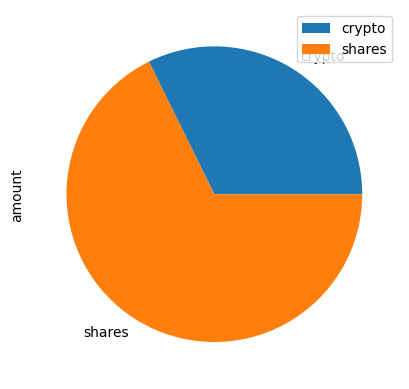

In [16]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
difference = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("You now have enough money in the fund, congratulations!")
elif total_savings == emergency_fund:
    print("Congratulations! You have now reached your financial goal")
else:
    print(f"You need {difference} to reach your financial goal")

You now have enough money in the fund, congratulations!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
start_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()

# Reorganize the DataFrame
df_stock_data = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date, 
).df

SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Display sample data
df_stock_data.head()

HTTPError: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v2/stocks/bars?timeframe=1D&adjustment=raw&start=2022-05-01T00%3A00%3A00-04%3A00&end=2017-05-01T00%3A00%3A00-04%3A00&symbols=AGG%2CSPY

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.4, 0.6]
num_yrs = 30
my_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

NameError: name 'df_stock_data' is not defined

In [38]:
# Printing the simulation input data
my_portfolio.portfolio_data.head()

NameError: name 'my_portfolio' is not defined

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
my_portfolio.calc_cumulative_return()

NameError: name 'my_portfolio' is not defined

In [32]:
# Plot simulation outcomes
line_plot = my_portfolio.plot_simulation()

NameError: name 'MC_thirty_year' is not defined

In [33]:
# Plot probability distribution and confidence intervals
dis_plot = my_portfolio.plot_distribution()

NameError: name 'MC_thirty_year' is not defined

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = my_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)



NameError: name 'my_portfolio' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'tbl' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")